In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Exploration

In [47]:
df_house_price = pd.read_csv('c:/users/tenoc/documents/datasets/chicago_price_data/houseprice.csv')
df_house_price.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [48]:
#there are 157 columns and 9 features
df_house_price.shape

(157, 9)

In [49]:
#descriptive stats
df_house_price.describe(include = 'all')

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [50]:
df_house_price.dtypes

Price        float64
Bedroom      float64
Space        float64
Room         float64
Lot          float64
Tax          float64
Bathroom     float64
Garage       float64
Condition    float64
dtype: object

In [51]:
#checking for any missing values
pd.isnull(df_house_price).sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [52]:
#dealing with missing values through imputation
df_house_price.fillna(df_house_price.mean(), inplace = True)

In [53]:
#no more mising values
pd.isnull(df_house_price).sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [54]:
#correlation matrix to check R values
df_house_price.corr()


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.302451,0.709174,0.578480,0.435381,0.493987,0.538485,0.553105,0.079336
Bedroom,0.302451,1.000000,0.569522,0.825630,0.314857,0.027496,0.546929,0.177596,-0.090582
Space,0.709174,0.569522,1.000000,0.744819,0.389862,0.542282,0.567528,0.382232,0.080498
Room,0.578480,0.825630,0.744819,1.000000,0.457210,0.117553,0.687434,0.300106,0.054667
Lot,0.435381,0.314857,0.389862,0.457210,1.000000,0.166208,0.387924,0.161835,-0.055720
Tax,0.493987,0.027496,0.542282,0.117553,0.166208,1.000000,-0.019595,0.375961,-0.144192
Bathroom,0.538485,0.546929,0.567528,0.687434,0.387924,-0.019595,1.000000,0.264371,-0.066534
Garage,0.553105,0.177596,0.382232,0.300106,0.161835,0.375961,0.264371,1.000000,0.104565
Condition,0.079336,-0.090582,0.080498,0.054667,-0.055720,-0.144192,-0.066534,0.104565,1.000000


Checking Distributions

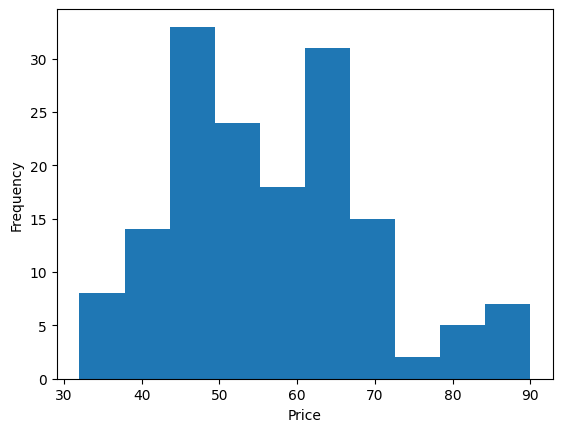

In [55]:
df_house_price['Price'].plot(kind = 'hist', bins = 10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

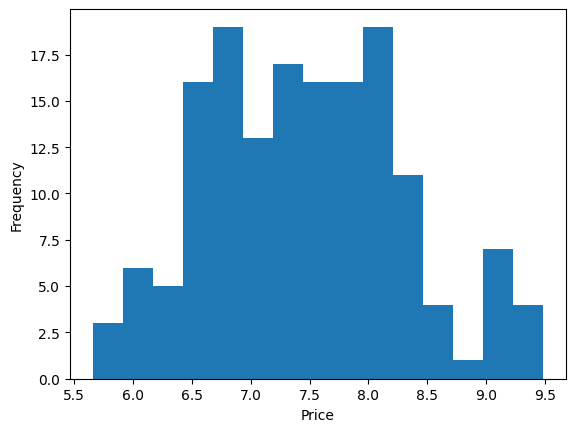

In [56]:
#trying transformation
df_house_price['Price'].apply(np.sqrt).plot(kind = 'hist', bins = 15)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

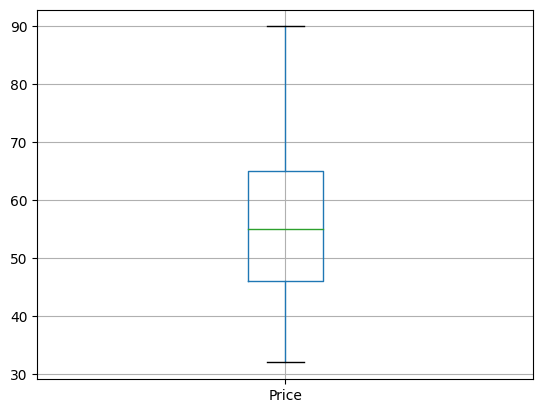

In [57]:
df_house_price.boxplot('Price')
plt.show()

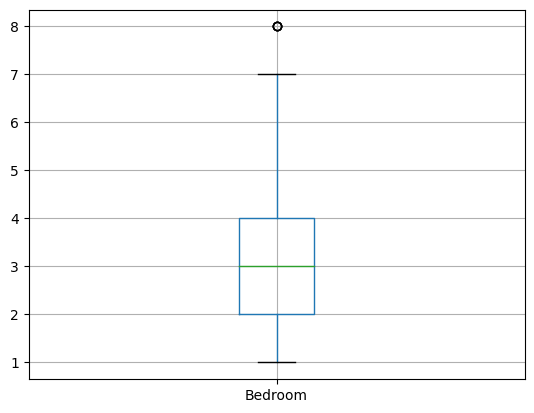

In [58]:
df_house_price.boxplot('Bedroom')
plt.show()

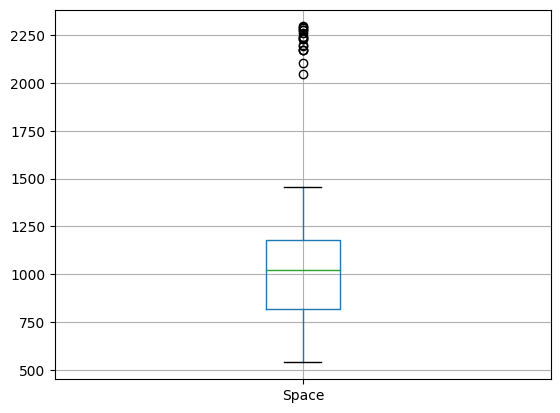

In [59]:
df_house_price.boxplot('Space')
plt.show()

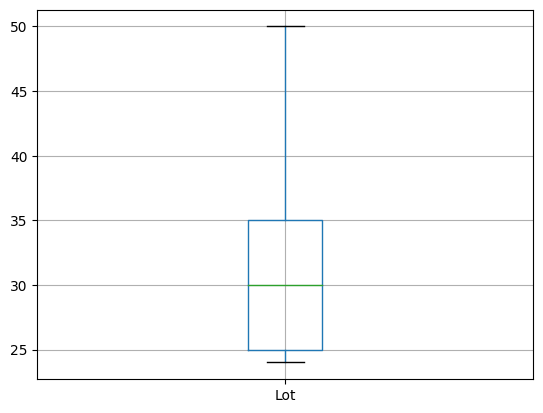

In [60]:
df_house_price.boxplot('Lot')
plt.show()

In [61]:
#getting list of outliers
def outlier_list(feature):
    Q1 = df_house_price[feature].quantile(0.25)
    Q3 = df_house_price[feature].quantile(0.75)
    iqr = (Q3 - Q1)
    lower_lim = Q1 - iqr * 1.5
    upper_lim = Q3 + iqr * 1.5

    outliers = []
    for i in df_house_price[feature]:
        if i < lower_lim or i > upper_lim:
            outliers.append(i)
    return outliers

print('Tax', outlier_list('Tax'))
print('Price', outlier_list('Price'))
print('Bedroom', outlier_list('Bedroom'))
print('Space', outlier_list('Space'))
print('Lot', outlier_list('Lot'))

Tax [2700.0, 2727.0, 2688.0, 2687.0, 2752.0, 2711.0]
Price []
Bedroom [8.0, 8.0, 8.0, 8.0]
Space [2261.0, 2104.0, 2240.0, 2230.0, 2173.0, 2278.0, 2191.0, 2171.0, 2295.0, 2045.0, 2228.0, 2287.0, 2170.0, 2293.0, 2196.0, 2240.0, 2277.0]
Lot []
